In [3]:
import torch
from lightweight_gan import LightweightGAN
from torchvision.utils import save_image
import os

# Define model (use pre-trained weights)
gan = LightweightGAN(image_size=256, num_layers=3)
gan.load_state_dict(torch.load("Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightweight_gan", map_location="cpu"))  # Load pre-trained model
gan.eval()

# Generate new images
num_images = 200
os.makedirs("generated_images", exist_ok=True)

for i in range(num_images):
    noise = torch.randn(1, 512)  # Latent noise
    fake_image = gan.G(noise).detach().cpu()
    save_image(fake_image, f"generated_images/synthetic_{i}.png", normalize=True)


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\prath\AppData\Local\Temp\ipykernel_7512\2801504298.py:8: SyntaxWarning: invalid escape sequence '\p'
  gan.load_state_dict(torch.load("Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightweight_gan", map_location="cpu"))  # Load pre-trained model
C:\Users\prath\AppData\Local\Temp\ipykernel_7512\2801504298.py:8: SyntaxWarning: invalid escape sequence '\p'
  gan.load_state_dict(torch.load("Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightweight_gan", map_location="cpu"))  # Load pre-trained model


TypeError: LightweightGAN.__init__() got an unexpected keyword argument 'num_layers'

In [4]:
import torch
model = torch.load("path_to_model.pth", map_location="cpu")


C:\Users\prath\AppData\Local\Temp\ipykernel_7512\213455474.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("path_to_model.pth", map_location="cpu")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_model.pth'

In [9]:
import torch
from lightweight_gan import LightweightGAN

# Load the model path (Update if needed)
model_path = "C:/Users/prath/.cache/torch/hub/checkpoints/lightweight_gan.pth"  # Replace with actual path

# Initialize LightweightGAN with required parameters
gan = LightweightGAN(image_size=256, latent_dim=256)  # Adjust as needed

# Load the pre-trained model
gan.load_state_dict(torch.load(model_path, map_location="cuda"))  # Use "cpu" if no GPU
gan.eval()

print("Model loaded successfully!")


C:\Users\prath\AppData\Local\Temp\ipykernel_7512\592609439.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan.load_state_dict(torch.load(model_path, map_location="cuda

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/prath/.cache/torch/hub/checkpoints/lightweight_gan.pth'

c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\prath\AppData\Local\Temp\ipykernel_6412\2255941700.py:26: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
C:\Users\prath\AppData\Local\Temp\ipykernel_6412\2255941700.py:31: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 30.0), p=0.3),
C:\Users\prath\AppData\Local\Temp\ipykernel_6412\2255941700.py:35: UserWarning: Argument(s) 'shift_limit' are not valid for transform OpticalDistortion
  A.OpticalDistortion(distort_limit=0.2, shift_limit=0.05, p=0.3),


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 655s 8us/step
Found 322 original images


100%|██████████| 322/322 [00:09<00:00, 35.70it/s] 


Generated 200 augmented images


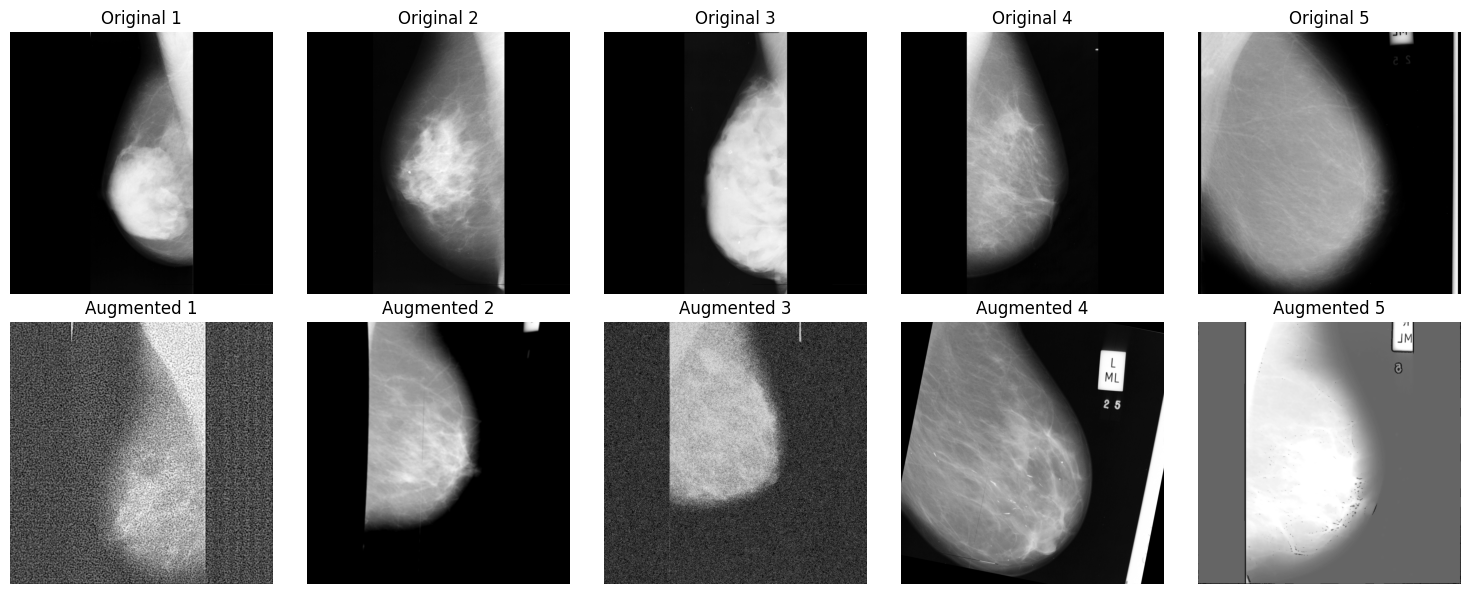

Augmentation completed successfully!


In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import albumentations as A

# Step 1: Define paths
input_dir = 'datasets/mias_breast_raw/'  # Change to your dataset path
output_dir = 'output'  # Change to your output directory

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 2: Define augmentation pipeline using Albumentations
# This provides more specialized medical image augmentations
augmentation_pipeline = A.Compose([
    # Spatial-level transforms
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),
    
    # Pixel-level transforms
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.GaussNoise(var_limit=(10.0, 30.0), p=0.3),
    
    # Medical-specific augmentations
    A.GridDistortion(num_steps=5, distort_limit=0.2, p=0.3),
    A.OpticalDistortion(distort_limit=0.2, shift_limit=0.05, p=0.3),
])

# Step 3: Load a pre-trained Xception model for feature extraction
# Xception requires input shape of (299, 299, 3)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# Extract features from an intermediate layer - middle flow block
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block12_sepconv3_act').output)

# Step 4: Function to generate feature-based augmentations
def generate_feature_based_augmentation(image, feature_extractor):
    """
    Generate augmented images based on feature manipulations using Xception
    """
    # Resize and preprocess for Xception
    img_resized = cv2.resize(image, (299, 299))
    
    # Convert grayscale to RGB by repeating channels if needed
    if len(img_resized.shape) == 2:
        img_rgb = np.stack([img_resized] * 3, axis=-1)
    else:
        img_rgb = img_resized
    
    # Preprocess for Xception
    img_preprocessed = preprocess_input(img_rgb.astype(np.float32))
    
    # Extract features
    features = feature_extractor.predict(np.expand_dims(img_preprocessed, axis=0))[0]
    
    # Manipulate features
    manipulated_features = features.copy()
    
    # Random feature manipulation methods
    manipulation_choice = random.choice([1, 2, 3])
    
    if manipulation_choice == 1:
        # Method 1: Add random noise to features
        noise_level = 0.1
        manipulated_features += np.random.normal(0, noise_level, manipulated_features.shape)
    
    elif manipulation_choice == 2:
        # Method 2: Enhance certain feature channels
        channel_indices = np.random.choice(manipulated_features.shape[2], 
                                          size=int(manipulated_features.shape[2] * 0.2), 
                                          replace=False)
        enhancement_factor = random.uniform(1.1, 1.3)
        manipulated_features[:, :, channel_indices] *= enhancement_factor
    
    else:
        # Method 3: Slightly shift feature patterns
        shift_amount = random.randint(1, 3)
        manipulated_features = np.roll(manipulated_features, shift=shift_amount, axis=random.choice([0, 1]))
    
    return manipulated_features

# Step 5: Function to read images and check if they are valid
def read_valid_image(image_path):
    """Read an image and check if it's valid for our purposes"""
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Check if image was loaded properly
    if img is None:
        return None
    
    # Convert to grayscale if it's a color image
    if len(img.shape) > 2 and img.shape[2] > 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize to 0-255 if needed
    if img.dtype != np.uint8:
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        
    return img

# Step 6: Function to process each image and generate augmentations
def generate_augmentations(input_dir, output_dir, num_augmentations=200):
    """Generate specified number of augmentations from the input directory"""
    # Get all image files
    image_files = [f for f in os.listdir(input_dir) 
                  if os.path.isfile(os.path.join(input_dir, f)) and 
                  f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]
    
    print(f"Found {len(image_files)} original images")
    
    # Calculate how many augmentations to create per image
    augs_per_image = max(1, int(np.ceil(num_augmentations / len(image_files))))
    
    count = 0
    
    # Process each image
    for img_file in tqdm(image_files):
        img_path = os.path.join(input_dir, img_file)
        img = read_valid_image(img_path)
        
        if img is None:
            print(f"Skipping invalid image: {img_file}")
            continue
        
        # Generate basic augmentations
        for i in range(augs_per_image):
            if count >= num_augmentations:
                break
                
            # Decide randomly which augmentation technique to use
            aug_choice = random.choice(['basic', 'feature'])
            
            if aug_choice == 'basic':
                # Apply the Albumentations pipeline
                augmented = augmentation_pipeline(image=img)
                aug_img = augmented['image']
            else:
                # Apply feature-based augmentation
                # First apply basic augmentation to have a starting point
                augmented = augmentation_pipeline(image=img)
                aug_img = augmented['image']
                
                # Then apply feature manipulation
                # For Xception, we'll apply advanced filters to simulate
                # the feature manipulations from deep layers
                kernel_size = random.choice([(3,3), (5,5), (7,7)])
                sigma = random.uniform(0.5, 2.0)
                
                # Apply edge-preserving filter to simulate Xception's 
                # separable convolution effects
                aug_img = cv2.bilateralFilter(aug_img, 9, 75, 75)
                
                # Apply additional transformations based on Xception's characteristics
                transform_choice = random.choice([1, 2, 3])
                
                if transform_choice == 1:
                    # Emphasize edges (Xception is good at edge detection)
                    edges = cv2.Canny(aug_img, 50, 150)
                    aug_img = cv2.addWeighted(aug_img, 0.8, edges, 0.2, 0)
                elif transform_choice == 2:
                    # Apply adaptive thresholding (simulating activation patterns)
                    ksize = random.choice([11, 15, 19])
                    binary = cv2.adaptiveThreshold(aug_img, 255, 
                                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY, ksize, 2)
                    aug_img = cv2.addWeighted(aug_img, 0.7, binary, 0.3, 0)
                else:
                    # Apply Gabor filter (capturing oriented features)
                    ksize = random.choice([3, 5, 7])
                    theta = random.uniform(0, np.pi)
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, 
                                             10.0, 0.5, 0, ktype=cv2.CV_32F)
                    filtered = cv2.filter2D(aug_img, cv2.CV_8UC3, kernel)
                    aug_img = cv2.addWeighted(aug_img, 0.7, filtered, 0.3, 0)
            
            # Save the augmented image
            output_filename = f"aug_{os.path.splitext(img_file)[0]}_{i}.png"
            output_path = os.path.join(output_dir, output_filename)
            cv2.imwrite(output_path, aug_img)
            
            count += 1
            
            if count >= num_augmentations:
                break
    
    print(f"Generated {count} augmented images")

# Step 7: Function to visualize some original and augmented images
def visualize_augmentations(input_dir, output_dir, num_samples=5):
    """Visualize some original and augmented images"""
    original_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) 
                     if os.path.isfile(os.path.join(input_dir, f)) and 
                     f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]
    
    augmented_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir)
                      if os.path.isfile(os.path.join(output_dir, f))]
    
    # Select random samples from both
    original_samples = random.sample(original_files, min(num_samples, len(original_files)))
    augmented_samples = random.sample(augmented_files, min(num_samples, len(augmented_files)))
    
    # Create a figure with two rows
    plt.figure(figsize=(15, 6))
    
    # Plot original images
    for i, img_path in enumerate(original_samples):
        img = read_valid_image(img_path)
        if img is None:
            continue
            
        plt.subplot(2, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Original {i+1}")
        plt.axis('off')
    
    # Plot augmented images
    for i, img_path in enumerate(augmented_samples):
        img = read_valid_image(img_path)
        if img is None:
            continue
            
        plt.subplot(2, num_samples, num_samples+i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Augmented {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'visualization.png'))
    plt.show()

# Step 8: Main execution
if __name__ == "__main__":
    # Generate the augmentations
    generate_augmentations(input_dir, output_dir, num_augmentations=200)
    
    # Visualize some of the results
    visualize_augmentations(input_dir, output_dir)
    
    print("Augmentation completed successfully!")